Average NPV: $197,556.28
Probability of Positive NPV: 98.61%
Decision: INVEST, A good NPV!


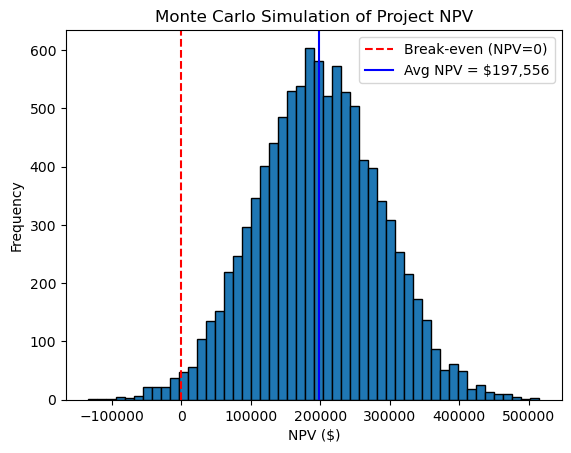

In [ ]:
#Monte Carlo Simulation for Project NPV Evaluation
# This script simulates the Net Present Value (NPV) of a project over a 5-year period using methods to account for uncertainty in cash flows. It helps in making investment decisions.

import numpy as np
import matplotlib.pyplot as plt

# Parameters
initial_investment = 1_000_000
years = 5
discount_rate = 0.08

# Cash flow assumptions
mean_cashflow = 300_000
std_dev_cashflow = 50_000   # risk/uncertainty

# Monte Carlo simulation
simulations = 10000
npvs = np.zeros(simulations)

for i in range(simulations):
    # Random annual cashflows
    cashflows = np.random.normal(mean_cashflow, std_dev_cashflow, years)

    # Discount each cashflow
    discounted = [cf / ((1 + discount_rate) ** (t+1))
                  for t, cf in enumerate(cashflows)]

    # Compute NPV
    npvs[i] = sum(discounted) - initial_investment

# Results
avg_npv = np.mean(npvs)
positive_prob = np.mean(npvs > 0) * 100

print(f"Average NPV: ${avg_npv:,.2f}")
print(f"Probability of Positive NPV: {positive_prob:.2f}%")

# Decision rule
if avg_npv > 0.500_000 and positive_prob > 65:
    decision = "INVEST, A good NPV!"
else:
    decision = "DO NOT INVEST!"

print(f"Decision: {decision}")

# Visualization
plt.hist(npvs, bins=50, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label="Break-even (NPV=0)")
plt.axvline(avg_npv, color='blue', linestyle='-',
            label=f"Avg NPV = ${avg_npv:,.0f}")
plt.title("Monte Carlo Simulation of Project NPV")
plt.xlabel("NPV ($)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


 Best multiple found: 1.728
Broke rate: 13.0 %
Profit rate: 80.5 %


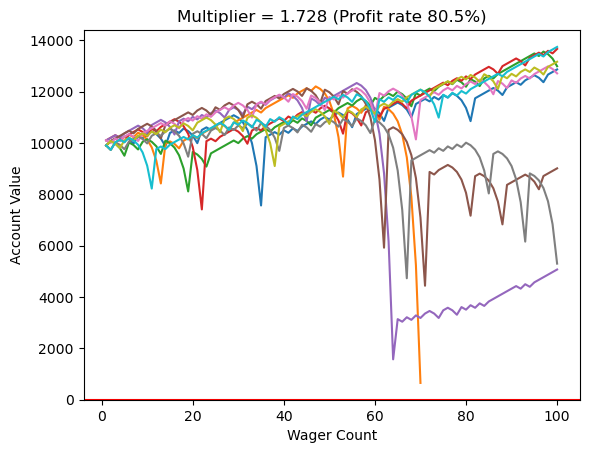

In [2]:
#Multiplier Betting Strategy Simulation. Finding Ideal Multiple for Betting Strategy Case Scenario

import random
import matplotlib.pyplot as plt

# Thresholds
LOWER_BROKE = 31.235
HIGHER_PROFIT = 63.208

# Simulation parameters
STARTING_FUNDS = 10000
WAGER_SIZE = 100
WAGER_COUNT = 100
SAMPLE_SIZE = 500   
RUNS_PER_MULTIPLE = 200  


def rollDice():
    """Simulates dice roll with custom win/lose probabilities."""
    roll = random.randint(1, 100)
    if roll == 100:
        return False
    elif roll <= 50:
        return False
    else:
        return True


def multiplier_bettor(funds, initial_wager, wager_count, random_multiple):
    """Runs one betting simulation for given multiplier."""
    value = funds
    wager = initial_wager
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if rollDice():
                value += wager
            else:
                value -= wager
                previousWager = 'loss'
                previousWagerAmount = wager
                if value <= 0:
                    return 0  # broke immediately
        else:  # previous loss
            if rollDice():
                wager = previousWagerAmount * random_multiple
                if value - wager < 0:
                    wager = value
                value += wager
                wager = initial_wager
                previousWager = 'win'
            else:
                wager = previousWagerAmount * random_multiple
                if value - wager < 0:
                    wager = value
                value -= wager
                previousWagerAmount = wager
                if value <= 0:
                    return 0
                previousWager = 'loss'

        currentWager += 1

    return value


def evaluate_multiple(random_multiple, runs=100):
    """Evaluate performance of a given multiple."""
    broke_count = 0
    profit_count = 0

    for _ in range(runs):
        final_value = multiplier_bettor(STARTING_FUNDS, WAGER_SIZE, WAGER_COUNT, random_multiple)
        if final_value <= 0:
            broke_count += 1
        elif final_value > STARTING_FUNDS:
            profit_count += 1

    broke_rate = (broke_count / runs) * 100
    profit_rate = (profit_count / runs) * 100
    return broke_rate, profit_rate


def find_best_multiple():
    """Search for the best-performing multiple."""
    best_multiple = None
    best_profit_rate = -1

    for _ in range(SAMPLE_SIZE):
        random_multiple = random.uniform(0.1, 10.0)
        broke_rate, profit_rate = evaluate_multiple(random_multiple, RUNS_PER_MULTIPLE)

        if broke_rate < LOWER_BROKE and profit_rate > HIGHER_PROFIT:
            if profit_rate > best_profit_rate:  # keep the best
                best_profit_rate = profit_rate
                best_multiple = (random_multiple, broke_rate, profit_rate)

    return best_multiple


def simulate_best_multiple(best_multiple):
    """Visualize wins/losses using the best multiple."""
    if not best_multiple:
        print("No profitable multiple found within thresholds.")
        return

    multiple, broke_rate, profit_rate = best_multiple
    print("\n Best multiple found:", round(multiple, 3))
    print("Broke rate:", round(broke_rate, 2), "%")
    print("Profit rate:", round(profit_rate, 2), "%")

    # Run again and plot outcomes
    for i in range(10):  # show 10 sample runs
        value = STARTING_FUNDS
        wager = WAGER_SIZE
        currentWager = 1
        previousWager = 'win'
        previousWagerAmount = WAGER_SIZE
        wX, vY = [], []

        while currentWager <= WAGER_COUNT:
            if previousWager == 'win':
                if rollDice():
                    value += wager
                else:
                    value -= wager
                    previousWager = 'loss'
                    previousWagerAmount = wager
                    if value <= 0:
                        break
            else:
                if rollDice():
                    wager = previousWagerAmount * multiple
                    if value - wager < 0:
                        wager = value
                    value += wager
                    wager = WAGER_SIZE
                    previousWager = 'win'
                else:
                    wager = previousWagerAmount * multiple
                    if value - wager < 0:
                        wager = value
                    value -= wager
                    previousWagerAmount = wager
                    if value <= 0:
                        break
                    previousWager = 'loss'

            wX.append(currentWager)
            vY.append(value)
            currentWager += 1

        plt.plot(wX, vY)

    plt.axhline(0, color='red')
    plt.title(
        f"Multiplier = {round(multiple, 3)} (Profit rate {round(profit_rate, 2)}%)")
    plt.xlabel("Wager Count")
    plt.ylabel("Account Value")
    plt.show()


# Main Execution Flow
best_multiple = find_best_multiple()
simulate_best_multiple(best_multiple)

In [ ]:
#WORKING CODE BELOW

import random
import matplotlib
import matplotlib.pyplot as plt
import time

lower_broke = 31.235
higher_profit = 63.208

sampleSize = 1000
startingFunds = 10000
wagerSize = 100
WagerCount = 100

def rollDice():
    roll = random.randint(1, 100)
    
    if roll == 100:
        #print(roll, "Roll value was 100 you lose. Good try but not enough! Try again.")
        return False
    elif roll <= 50:
        #print(roll, "Roll value was between 1-50. Too little, you lose! Try again.")
        return False
    elif 100 > roll > 50:
        #print(roll, "Roll value was between 51-99. You win, Congratulations! *Play More*!")
        return True
    
def multiplier_bettor(funds, initial_wager, wager_count):
    global multiplier_broke
    global multiplier_profits
    
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            # print("Previous wager was a win")
            if rollDice():
                value += wager
                # print(value)
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager
                previousWager = 'loss'
                # print(value)
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value <= 0:
                    # print("Broke after".currentWager, "bets")
                    multiplier_broke += 1
                    break

        elif previousWager == 'loss':
           # print("Previous wager was a loss so we double on it")
           if rollDice():
            wager = previousWagerAmount * random_multiple

            if (value - wager) < 0:
                wager = value
            # print("We Won", wager)
            value += wager
            # print(value)
            wager = initial_wager
            previousWager = 'win'
            wX.append(currentWager)
            vY.append(value)
           else:
            wager = previousWagerAmount * random_multiple
            if (value - wager) < 0:
                wager = value
            # print("We Lost", wager)
            value -= wager
            previousWagerAmount = wager
            wX.append(currentWager)
            vY.append(value)
            if value <= 0:
                # print('we went broke after',currentWager,'bets')
                multiplier_broke += 1
                break

            # print(value)
            previousWager = 'loss'

        currentWager += 1

    # print(value)
    plt.plot(wX, vY)
    if value > funds:
        multiplier_profits += 1
        
        
        

def doubler_bettor(funds, initial_wager, wager_count, color):
    value = funds
    wager = initial_wager
    global doubler_broke
    global doubler_profits
    wX = []
    vY = []
    
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager
    
    while currentWager <= wager_count:
        if previousWager == 'win':
            #print("Previous wager was a win")
            if rollDice():
                value += wager
                #print(value)
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager
                previousWager = 'loss'
                #print(value)
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value <= 0:
                    #print("Broke after".currentWager, "bets")
                    doubler_broke += 1
                    break
                    
        elif previousWager == 'loss':
           #print("Previous wager was a loss so we double on it")
           if rollDice():
            wager = previousWagerAmount * 2
            
            if (value - wager) < 0:
                wager = value
            #print("We Won", wager) 
            value += wager
            #print(value)
            wager = initial_wager
            previousWager = 'win'
            wX.append(currentWager)
            vY.append(value)
           else: 
            wager = previousWagerAmount * 2
            if (value - wager) < 0:
                wager = value
            #print("We Lost", wager) 
            value -= wager
            previousWagerAmount = wager
            wX.append(currentWager)
            vY.append(value)
            if value <= 0:
                #print('we went broke after',currentWager,'bets')
                doubler_broke += 1
                break
                
            #print(value)
            previousWager = 'loss'
            
        currentWager += 1
        
    #print(value)
    plt.plot(wX, vY)
    if value > funds:
        doubler_profits += 1

'''xx = 0 
doubler_broke= 0

while xx < 1000:
    doubler_bettor(10000, 100, 1000)
    xx += 1
    
print('Death Rate:', (doubler_broke/float(xx))*100, '%')
print('Survival Rate:', 100 - (doubler_broke/float(xx))*100, '%')

plt.axhline(0, color='r')
plt.show()'''

x = 0

while True: 
 multiplier_broke = 0.0
 multiplier_profits = 0.0
 
 multipleSamSize = 100
 currentSample = 1
 
 random_multiple = random.uniform(0.1,10.0)
 while currentSample <= multipleSamSize:
     multiplier_bettor(startingFunds, wagerSize, WagerCount)
     currentSample += 1
     
 if ((multiplier_broke/multipleSamSize)*100 < lower_broke) and ((multiplier_profits/multipleSamSize)*100 > higher_profit):
     print('########')
     print('Found a good multiple:', random_multiple)
     print('Lower broke to beat', lower_broke, '%')
     print('Higher profit to beat', higher_profit, '%')
     print('broke rate:', (multiplier_broke/multipleSamSize)*100, '%')
     print('profit rate:', (multiplier_profits/multipleSamSize)*100, '%')
     print('########')

 else:
     pass
     '''print('########')
     print('No good multiple found:', random_multiple)
     print('Lower broke to beat', lower_broke, '%')
     print('Higher profit to beat', higher_profit, '%')
     print('broke rate:', (multiplier_broke/multipleSamSize)*100, '%')
     print('profit rate:', (multiplier_profits/multipleSamSize)*100, '%')
     print('########')'''


#while x < sampleSize:
 #   doubler_bettor(startingFunds, wagerSize, WagerCount, 'c')
  #  x += 1
    
#print('Doubler Bettor broke chance:', (doubler_broke/sampleSize)*100, '%')
#print('Doubler Bettor profit chance:', (doubler_profits/sampleSize)*100, '%')

#plt.axhline(0, color='r')
#plt.ylabel('Account Value')
#plt.xlabel('Wager Count')
#plt.show()'

    

            

########
Found a good multiple: 1.8713039847496264
Lower broke to beat 31.235 %
Higher profit to beat 63.208 %
broke rate: 21.0 %
profit rate: 64.0 %
########
########
Found a good multiple: 1.6332582636126372
Lower broke to beat 31.235 %
Higher profit to beat 63.208 %
broke rate: 10.0 %
profit rate: 72.0 %
########
########
Found a good multiple: 1.8371443802490801
Lower broke to beat 31.235 %
Higher profit to beat 63.208 %
broke rate: 24.0 %
profit rate: 65.0 %
########
########
Found a good multiple: 1.6681752760866575
Lower broke to beat 31.235 %
Higher profit to beat 63.208 %
broke rate: 6.0 %
profit rate: 73.0 %
########
########
Found a good multiple: 2.099837762034915
Lower broke to beat 31.235 %
Higher profit to beat 63.208 %
broke rate: 27.0 %
profit rate: 71.0 %
########
########
Found a good multiple: 1.8692176122550352
Lower broke to beat 31.235 %
Higher profit to beat 63.208 %
broke rate: 21.0 %
profit rate: 64.0 %
########
########
Found a good multiple: 1.86232378508868

KeyboardInterrupt: 

Simple Bettor broke chance: 0.0 %
Simple Bettor profit chance: 38.1 %


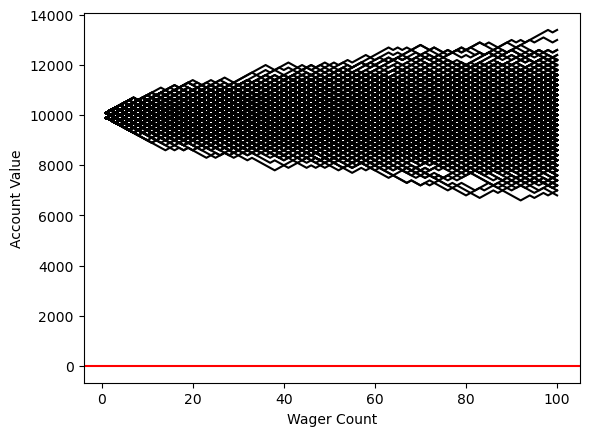

In [ ]:
#Simple Betting Strategy Simulation

import random
import matplotlib.pyplot as plt

sampleSize = 1000

startingFunds = 10000
wagerSize = 100
WagerCount = 100


def rollDice():
    roll = random.randint(1, 100)
    return roll > 50 and roll < 100  # True if win, False if loss


def simple_bettor(funds, initial_wager, wager_count, color):
    global simple_broke
    global simple_profits
    value = funds
    wager = initial_wager
    wX = []
    vY = []

    for currentWager in range(1, wager_count + 1):
        if rollDice():
            value += wager
        else:
            value -= wager

        wX.append(currentWager)
        vY.append(value)

        if value <= 0:  # went broke
            simple_broke += 1
            break  # stop sim when bankrupt

    # Plot bankroll trajectory
    plt.plot(wX, vY, color)

    # Count profit if ending bankroll > starting
    if value > funds:
        simple_profits += 1


# Run simulations
x = 0
simple_broke = 0
simple_profits = 0

while x < sampleSize:
    simple_bettor(startingFunds, wagerSize, WagerCount, 'k')
    x += 1

print('Simple Bettor broke chance:', (simple_broke/sampleSize)*100, '%')
print('Simple Bettor profit chance:', (simple_profits/sampleSize)*100, '%')

plt.axhline(0, color='r')
plt.ylabel('Account Value')
plt.xlabel('Wager Count')
plt.show()

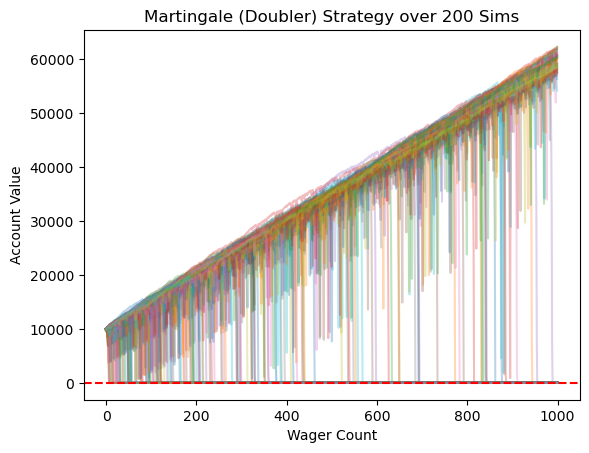

In [20]:
#Martingale (doubler) bettor with NumPy

import numpy as np
import matplotlib.pyplot as plt

def rollDice_vectorized(n_rolls):
    # Generate all rolls at once
    rolls = np.random.randint(1, 101, size=n_rolls)
    # True = win (51–99), False = loss (1–50 or 100)
    return (rolls > 50) & (rolls < 100)

def doubler_bettor_numpy(funds, initial_wager, wager_count):
    value = funds
    wager = initial_wager
    bankroll = np.zeros(wager_count, dtype=int)

    previousWager = 'win'
    previousWagerAmount = initial_wager

    # Pre-generate all outcomes
    results = rollDice_vectorized(wager_count)

    for i in range(wager_count):
        if previousWager == 'win':
            if results[i]:
                value += wager
                previousWager = 'win'
            else:
                value -= wager
                previousWager = 'loss'
                previousWagerAmount = wager
                if value <= 0:
                    bankroll[i:] = 0
                    return bankroll
        elif previousWager == 'loss':
            wager = previousWagerAmount * 2
            if results[i]:
                value += wager
                wager = initial_wager
                previousWager = 'win'
            else:
                value -= wager
                previousWager = 'loss'
                previousWagerAmount = wager
                if value <= 0:
                    bankroll[i:] = 0
                    return bankroll
        bankroll[i] = value

    return bankroll

# Run many simulations
num_simulations = 200
wager_count = 1000
funds = 10000
initial_wager = 100

for _ in range(num_simulations):
    bankroll = doubler_bettor_numpy(funds, initial_wager, wager_count)
    plt.plot(bankroll, alpha=0.3)  # fade lines for clarity

plt.axhline(0, color='r', linestyle='--')
plt.title(f"Martingale (Doubler) Strategy over {num_simulations} Sims")
plt.xlabel("Wager Count")
plt.ylabel("Account Value")
plt.show()


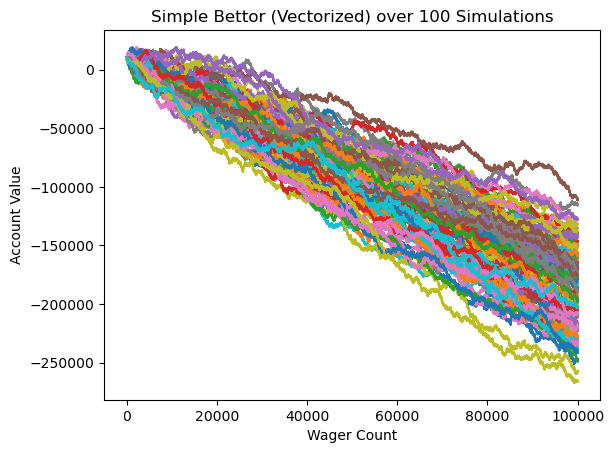

In [ ]:
#vectorized dice rolls for more complex and faster simulations

import numpy as np
import matplotlib.pyplot as plt

def rollDice_vectorized(n_rolls):
    # Generate all rolls at once (fast)
    rolls = np.random.randint(1, 101, size=n_rolls)
    # Win = 51–99, Lose = 1–50 or 100
    results = (rolls > 50) & (rolls < 100)  # True for win, False for loss
    return results.astype(int)  # 1 = win, 0 = loss

def simple_bettor_vectorized(funds, wager, wager_count):
    # Generate outcomes
    results = rollDice_vectorized(wager_count)
    # Convert win=+wager, loss=-wager
    outcomes = np.where(results == 1, wager, -wager)
    # Track bankroll progression
    bankroll = funds + np.cumsum(outcomes)
    return bankroll

# Example: run multiple simulations
num_simulations = 100
wager_count = 100000
funds = 10000
wager = 100

for _ in range(num_simulations):
    bankroll = simple_bettor_vectorized(funds, wager, wager_count)
    plt.plot(range(1, len(bankroll)+1), bankroll)

plt.ylabel('Account Value')
plt.xlabel('Wager Count')
plt.title(f'Simple Bettor (Vectorized) over {num_simulations} Simulations')
plt.show()
